**Name:** Kamran Ansari

**Reg No:** 22MCA0223

# Question 1

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
!wget https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/archive/refs/heads/master.zip
!unzip master.zip
!mv Brain-Tumor-Classification-DataSet-master brain

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/brain/Training',
        target_size=(224, 224),
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        '/content/brain/Testing',
        target_size=(224, 224),
        class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [5]:
model_history = model.fit(
train_generator,
epochs = 30,
validation_data = validation_generator)

Epoch 1/30
90/90 [==============================] - 22s 97ms/step - loss: 0.9631 - accuracy: 0.5760 - val_loss: 1.8396 - val_accuracy: 0.3883
Epoch 2/30
90/90 [==============================] - 8s 90ms/step - loss: 0.5655 - accuracy: 0.7627 - val_loss: 2.2189 - val_accuracy: 0.5025
Epoch 3/30
90/90 [==============================] - 8s 93ms/step - loss: 0.4120 - accuracy: 0.8338 - val_loss: 3.3212 - val_accuracy: 0.5203
Epoch 4/30
90/90 [==============================] - 8s 89ms/step - loss: 0.2478 - accuracy: 0.9094 - val_loss: 2.9880 - val_accuracy: 0.6472
Epoch 5/30
90/90 [==============================] - 8s 84ms/step - loss: 0.1625 - accuracy: 0.9415 - val_loss: 1.9131 - val_accuracy: 0.7081
Epoch 6/30
90/90 [==============================] - 8s 94ms/step - loss: 0.1009 - accuracy: 0.9603 - val_loss: 3.6339 - val_accuracy: 0.7081
Epoch 7/30
90/90 [==============================] - 8s 94ms/step - loss: 0.1044 - accuracy: 0.9641 - val_loss: 3.7232 - val_accuracy: 0.7386
Epoch 8/30
9

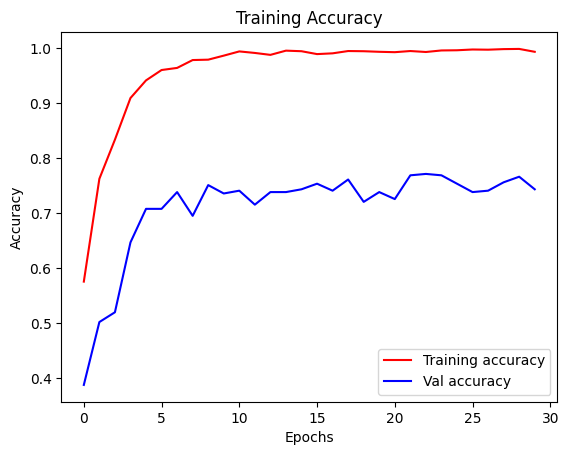

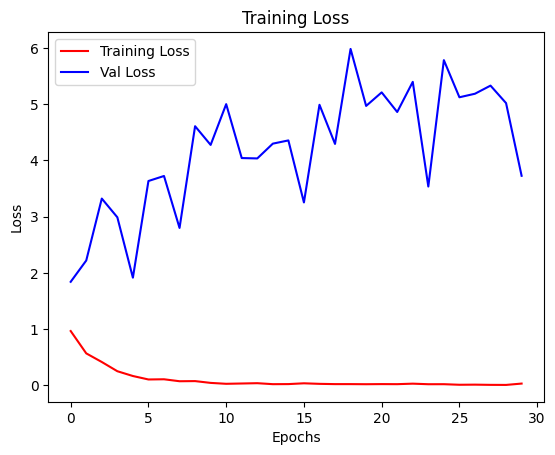

In [6]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Question 2

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/brain/Training',
        target_size=(299, 299),
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        '/content/brain/Testing',
        target_size=(299, 299),
        class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
model = tf.keras.applications.InceptionV3(weights = "imagenet", include_top = False, input_shape = (299, 299, 3))

x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)

predictions = tf.keras.layers.Dense(4, activation="softmax")(x)
model = tf.keras.Model(inputs = model.input, outputs = predictions)
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [9]:
model_history = model.fit(
train_generator,
epochs = 30,
validation_data = validation_generator)

Epoch 1/30
90/90 [==============================] - 104s 612ms/step - loss: 10.9796 - accuracy: 0.4498 - val_loss: 731023.9375 - val_accuracy: 0.2589
Epoch 2/30
90/90 [==============================] - 44s 491ms/step - loss: 1.6101 - accuracy: 0.5226 - val_loss: 137.7488 - val_accuracy: 0.3147
Epoch 3/30
90/90 [==============================] - 45s 495ms/step - loss: 0.8996 - accuracy: 0.6010 - val_loss: 2.0937 - val_accuracy: 0.4442
Epoch 4/30
90/90 [==============================] - 45s 503ms/step - loss: 0.6900 - accuracy: 0.6920 - val_loss: 1.2969 - val_accuracy: 0.6117
Epoch 5/30
90/90 [==============================] - 45s 499ms/step - loss: 0.5096 - accuracy: 0.7986 - val_loss: 1.6214 - val_accuracy: 0.5355
Epoch 6/30
90/90 [==============================] - 45s 497ms/step - loss: 0.4160 - accuracy: 0.8425 - val_loss: 1.7199 - val_accuracy: 0.5152
Epoch 7/30
90/90 [==============================] - 46s 509ms/step - loss: 0.3392 - accuracy: 0.8721 - val_loss: 1.7179 - val_accurac

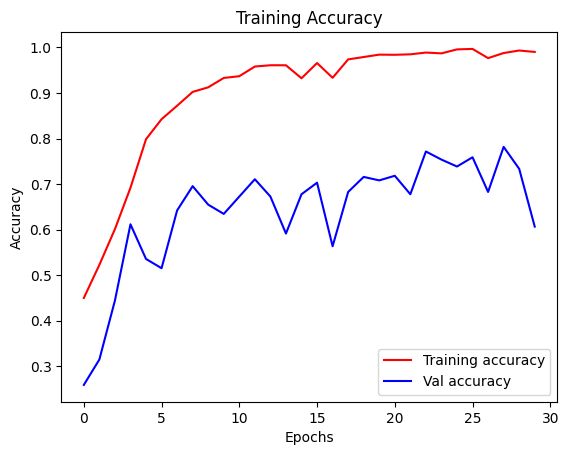

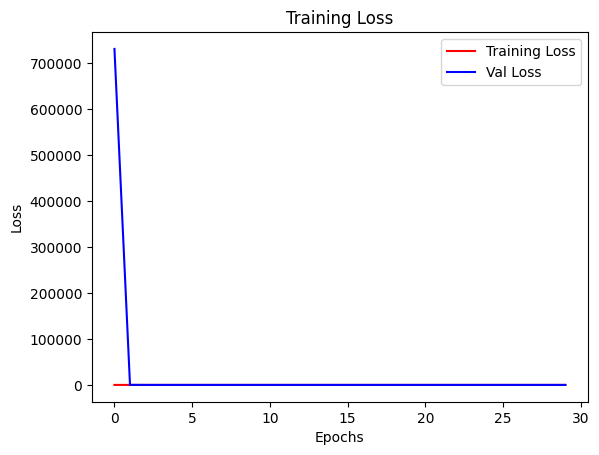

In [10]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()